In [1]:
%pylab inline
import pandas as pd
from collections import defaultdict

FILE = "scripts/downsample_aggregation.txt"

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
for line in file(FILE):
    nth, fname, aggs = line.split(" ", 2)
    aggs = eval(aggs)
    
    if "multiscale/2/kernel_blas_op_dot_product_int_size_5000000000_reps_1.hdf5" in fname:
        print aggs
        
    print nth, fname, type(aggs)
    for sensor in aggs:
        for aggregation in aggs[sensor]:
            data[fname][sensor][aggregation][nth] = aggs[sensor][aggregation]
#data

1 ../data/new/AdeptDataForPatrick/multisample/1/kernel_blas_op_axpy_double_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/2/kernel_blas_op_axpy_double_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/3/kernel_blas_op_axpy_double_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/1/kernel_blas_op_axpy_float_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/2/kernel_blas_op_axpy_float_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/3/kernel_blas_op_axpy_float_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/1/kernel_blas_op_axpy_int_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/2/kernel_blas_op_axpy_int_size_5000000000_reps_1.hdf5 <type 'dict'>
1 ../data/new/AdeptDataForPatrick/multisample/3/kernel_blas_op_axpy_int_s

1000 ../data/new/AdeptDataForPatrick/multiscale/4/kernel_blas_op_norm_double_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/8/kernel_blas_op_norm_double_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/1/kernel_blas_op_norm_float_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/2/kernel_blas_op_norm_float_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/4/kernel_blas_op_norm_float_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/8/kernel_blas_op_norm_float_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/1/kernel_blas_op_norm_int_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/2/kernel_blas_op_norm_int_size_5000000000_reps_1.hdf5 <type 'dict'>
1000 ../data/new/AdeptDataForPatrick/multiscale/4/kernel_b

In [57]:
results = []
for filename, filedata in data.iteritems():
    for sensorname, sensordata in filedata.iteritems():
        for aggname, aggdata in sensordata.iteritems():
            results.append([filename, sensorname, aggname, 1, (aggdata["1"] / aggdata["1"])-1])
            results.append([filename, sensorname, aggname, 10, (aggdata["10"] / aggdata["1"])-1])
            results.append([filename, sensorname, aggname, 100, (aggdata["100"] / aggdata["1"])-1])
            results.append([filename, sensorname, aggname, 1000, (aggdata["1000"] / aggdata["1"])-1])

df = pd.DataFrame(results, columns=["filename", "sensor", "aggregation", "downsample factor", "rel. error"])

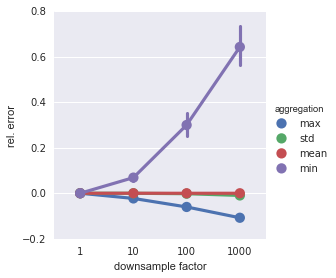

In [67]:
df.head()
sns.factorplot(x="downsample factor", y="rel. error", hue="aggregation", data=df[df.aggregation != "count"])
plt.savefig("rel_error.pdf")

In [ ]:
%pylab inline
import seaborn as sns

In [71]:
summary = df.groupby(["aggregation", "downsample factor"]).mean().unstack()
print summary.xs("rel. error", axis=1).to_latex(float_format="%.3f")

\begin{tabular}{lrrrr}
\toprule
downsample factor &  1    &   10   &   100  &   1000 \\
aggregation &       &        &        &        \\
\midrule
count       &   0.0 & -1.000 & -1.000 & -1.000 \\
max         &   0.0 & -0.023 & -0.060 & -0.108 \\
mean        &   0.0 &  0.000 & -0.000 & -0.000 \\
min         &   0.0 &  0.069 &  0.300 &  0.643 \\
std         &   0.0 & -0.000 & -0.002 & -0.010 \\
\bottomrule
\end{tabular}



In [66]:
cat

^C
